In [3]:
import matplotlib
matplotlib.use('Agg')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline  

In [4]:
db = pd.read_csv('income_stat_all_us_list.csv')
db = db.drop(['gvkey','datadate','indfmt','consol','popsrc','datafmt'],1)
db = db.drop(['curcd','batr','bct','bctr','citotal','cik','cga','cgti'],1)
db = db.drop(['ibki','initb','ipti','isgt','ivi','li','nfsr',
              'niit','niint','nim','nit','nits','opili','opiti','patr'],1)
db = db.drop(['ptbl','rcp','spce','stkco','tie','tii','txds','xlr','xnitb',
              'xoprar','xrd','xt','xuwti','costat'],1)
db = db.drop(['tic'],1)
# Removes variables non relevant to data or with over 50% of values missing

In [5]:
comName = db.conm.unique()
varDict = db.columns.values
varDict = np.delete(varDict, [0,1])
comData = {}
corrDict = {}
count = 0
#corrArray = np.zeros(shape=(22,22,1),dtype=np.float32)
# Gets company names, column names, and initializes an empty dictionary

In [6]:
np.shape(comName)

(5581,)

In [7]:
def cleanRow(x):
    headName = x.columns.values
    x = x.dropna(subset=headName)
    return x
# Function to clean rows (Removes NaNs)

In [8]:
def getTwoColumns(database,j,k):
    xByTwo = database[[database.columns[j],database.columns[k]]]
    return xByTwo
# Gets columns j and k in a database

In [9]:
for i in comName[0:4]:
    comData[i] = db.loc[db['conm'] == i]
    comData[i] = comData[i].drop(['conm','fyear'],1)
    columnName = comData[i].columns.values
    corrDB = pd.DataFrame(columns=varDict,index=varDict)
    for j in xrange(len(columnName)-1):
        for k in xrange((len(columnName)-j)-1):
            test = getTwoColumns(comData[i],j,k+j+1)
            test = cleanRow(test)
            correlation = test.corr(method='pearson')
            corr = correlation.iat[1,0]            
            corrDB.at[correlation.columns[0],correlation.columns[1]] = corr            
    
    corrMatrix = corrDB.as_matrix()
    corrMatrix.reshape(22,22,1)
    if count == 0:
        corrArray = corrMatrix
    else:
        corrArray = np.dstack((corrArray, corrMatrix))
    #corrArray = corrArray[~np.isnan(corrArray)]
    count += 1


In [10]:
corrArray = corrArray.astype(np.float32)
#where_are_NaNs = np.isnan(corrArray)
#Where_are_NaNs.shape
#corrArray[where_are_NaNs] = .5

KeyboardInterrupt: 

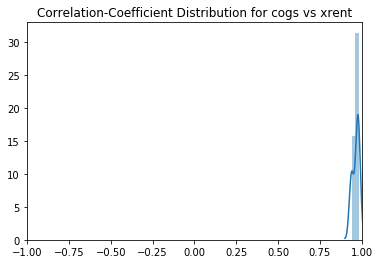

In [12]:
for i in range(22):
    for j in range(22):
        plt.gcf().clear()
        newCorrArray = corrArray[i,j,:]
        corrArrayFix = newCorrArray[~np.isnan(newCorrArray)]
        np.shape(corrArrayFix)
        ax = plt.axes()
        var = sns.distplot(corrArrayFix, ax=ax, kde = True, hist = True).set(xlim=(-1, 1))
        ax.set_title('Correlation-Coefficient Distribution for %s vs %s' % (varDict[i],varDict[j]))
        #fig1 = var[i][j].get_figure()
        #fig = ax.get_figure()
        plt.savefig("./DistImg/%s-%s.png" %(varDict[i],varDict[j]), dpi=300,)
        